Import and evaluation of the performance of .csv files generated in the 1-FMUImportSimulationAndExport file where four different FMUs were simulated with the same control signal sequence.

The results is then compared to a .csv export from the same model simulation performed in OpenModelica with the same control sequence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table

# Generate data frames based on exported CSV files
# Imported data from simulation in Modelica
dfRef = pd.read_csv("datafiles/exportedVariablesFromModelicaREV.csv")

#FMU model generated with explicit Euler in Open Modelica into a variable
dfOMeE = pd.read_csv("datafiles/airHeaterOMexpEulSimData.csv")

# FMU model generated with Cvode in Open Modelica into a variable
dfOMcv = pd.read_csv("datafiles/airHeaterOMcvodeSimData.csv")

# FMU model generated with Cvode in Dymola into a variable
dfDYMcv = pd.read_csv("datafiles/airHeaterDymolaCvodeSimData.csv")

# FMU model generated with Dymola Dassl solver in dymola into a variable
dfDYMdas = pd.read_csv("datafiles/airHeaterDymolaOEMSimData.csv")


In [2]:
# Remove the percentiles from the output
perc = []

# Write statistical properties of the imported data from Modelica simulation to a CSV file
dfRef.describe(percentiles=perc).to_csv("Tables/describeModelicaReference.csv")

# Write statistical properties of the imported FMU model generated with explicit Euler in Open Modelica to a CSV file
dfOMeE.describe(percentiles=perc).to_csv("Tables/describeOMexpEul.csv")

# Write statistical properties of the imported FMU model generated with Cvode in Open Modelica to a CSV file
dfOMcv.describe(percentiles=perc).to_csv("Tables/describeOMcvode.csv")

# Write statistical properties of the imported FMU model generated with Cvode in Dymola to a CSV file
dfDYMcv.describe(percentiles=perc).to_csv("Tables/describeDymolaCvode.csv")

# Write statistical properties of the imported FMU model generated with Dymola Dassl solver in dymola to a CSV file
dfDYMdas.describe(percentiles=perc).to_csv("Tables/describeDymolaDassl.csv")

In [3]:
## Generate a new dataframe to evaluate the difference between the different FMUs temperature output and the Modelica simulation
dfTOut_diff = dfRef[['time']].copy()

# Calculate the difference between the Modelica export and OpenModelica_Explicit_Euler
dfTOut_diff['OpenModelica_Explicit_Euler'] = dfRef['T_Out'] - dfOMeE['T_Out_ext']

# Calculate the difference between the Modelica export and OpenModelica_Cvode
dfTOut_diff['OpenModelica_Cvode'] = dfRef['T_Out'] - dfOMcv['T_Out_ext']

# Calculate the difference between the Modelica export and Dymola_Cvode
dfTOut_diff['Dymola_Cvode'] = dfRef['T_Out'] - dfDYMcv['T_Out_ext']

# Calculate the difference between the Modelica export and Dymola_Dassl
dfTOut_diff['Dymola_Dassl'] = dfRef['T_Out'] - dfDYMdas['T_Out_ext']

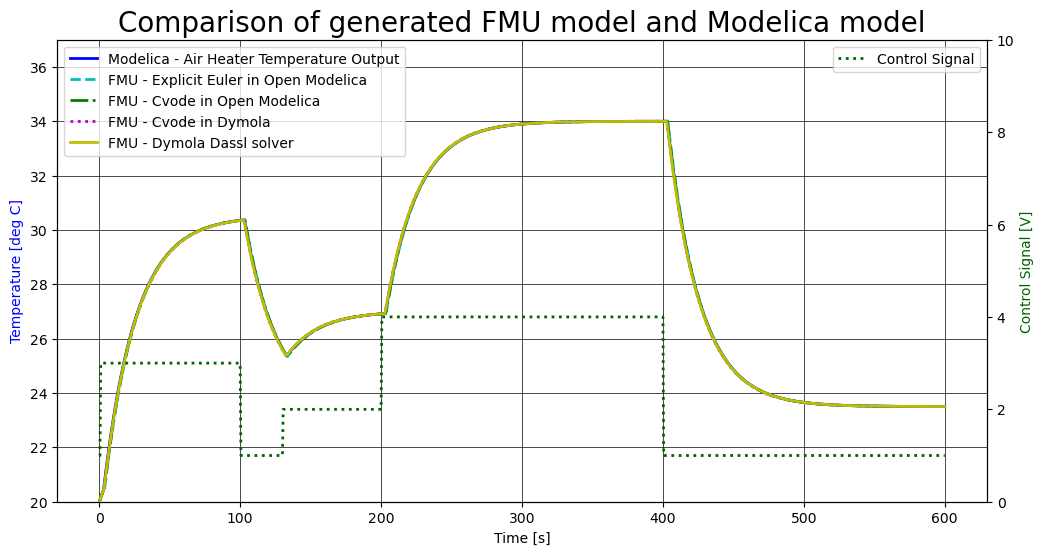

In [4]:
# Plotting of the output temperature and control signal for both FMU and Modelica model
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Comparison of generated FMU model and Modelica model', fontsize=20)

# convert to dual y-axises
ax2 = ax1.twinx()

#Range of both X-axises
ax1.set_ylim(20, 37);
ax2.set_ylim(0, 10);

# Set up the axis labels
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [deg C]', color='b')
ax2.set_ylabel('Control Signal [V]', color='darkgreen')

# Customize the major grid (outer grid)
ax1.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up data to be plotted with additional parameters
ax1.plot(dfRef.time, dfRef.T_Out, 'b-', label='Modelica - Air Heater Temperature Output', linewidth=2)
ax1.plot(dfRef.time, dfOMeE.T_Out_ext,  'c', linestyle='--', label='FMU - Explicit Euler in Open Modelica', linewidth=2)
ax1.plot(dfRef.time, dfOMcv.T_Out_ext,  'g', linestyle='-.', label='FMU - Cvode in Open Modelica', linewidth=2)
ax1.plot(dfRef.time, dfDYMcv.T_Out_ext,  'm', linestyle=':', label='FMU - Cvode in Dymola', linewidth=2)
ax1.plot(dfRef.time, dfDYMdas.T_Out_ext,  'y', linestyle='-', label='FMU - Dymola Dassl solver', linewidth=2)

ax2.plot(dfRef.time, dfOMeE.u_ext, 'darkgreen', linestyle=':', label='Control Signal', linewidth=2)

# Configure placement of data legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save a copy of the plot
plt.savefig('plots/pltComparePyandMod4FMUs.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Plotting of the output difference in temperature from the FMU and Modelica simulations
fig, ax3 = plt.subplots(figsize=(12, 6));
plt.title('Difference Between Modelica Simulations and Different FMUs', fontsize=20);

# convert to dual y-axises
ax4 = ax3.twinx();

#Range of both X-axises
ax3.set_ylim(-0.4, 0.5);
ax4.set_ylim(0, 5);

# Set up the axis labels
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Temperature [deg C]', color='k')
ax4.set_ylabel('Control Signal [V]', color='darkgreen')

# Customize the major grid (outer grid)
ax3.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up data to be plotted with additional parameters
ax3.plot(dfRef.time, dfTOut_diff.OpenModelica_Explicit_Euler, 'm-', label='OpenModelica_Explicit_Euler', linewidth=1.5)
ax3.plot(dfRef.time, dfTOut_diff.OpenModelica_Cvode, 'c', linestyle='--', label='OpenModelica_Cvode', linewidth=1.5)
ax3.plot(dfRef.time, dfTOut_diff.Dymola_Cvode, 'g', linestyle='-.', label='Dymola_Cvode', linewidth=1.5)
ax3.plot(dfRef.time, dfTOut_diff.Dymola_Dassl, 'b', linestyle=':', label='Dymola_Dassl', linewidth=1.5)

ax4.plot(dfRef.time, dfOMeE.u_ext, 'darkgreen', linestyle=':', label='Control Signal', linewidth=2)

# Configure placement of data legends
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

# Save a copy of the plot
plt.savefig('plots/pltCompareDiff4FMU.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Write statistical properties of the difference between the imported FMU models and the Modelica export to a CSV file
describe_df_dfTOut_diff =dfTOut_diff.describe(percentiles=perc).to_csv("Tables/describeDifference")

# Write statistical properties of the difference between the imported FMU models and the Modelica export variable for plotting
describe_df_dfTOut_diff = dfTOut_diff.describe(percentiles=perc)

# Remove the variables time, counter, median, and mean
describe_df_dfTOut_diff_plt = describe_df_dfTOut_diff.drop(index=['count','50%','mean'], columns='time')

In [ ]:
# Plotting of the statistical properties for the difference between FMUs and Modelica exported data
ax5 = describe_df_dfTOut_diff_plt.plot.bar(figsize=(12, 6), width=0.7)
plt.title('Statistical Properties for Calculated Difference Between Modelica Export and Simulated FMUs', fontsize=20);

# Customize the major grid (outer grid)
ax5.grid(which='both', linestyle='-', linewidth='0.5', color='black')

# Set up the axis labels
ax5.set_xlabel('Statistical properties')
ax5.set_ylabel('Temperature [deg C]')

#Range of both X-axises
ax5.set_ylim(-0.3, 0.3);

# Save a copy of the plot to file
plt.savefig('plots/pltCompareDiff4FMU_BAR.png', dpi=300, bbox_inches='tight')